<b>Name:</b> Aishwarya Bhavsar<br>
<b>CSULBID:</b> 029371509<br>
CECS 551 Assignment 7

**Import Libraries And Download Dataset**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras import models
from keras import layers
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


**Normalize The Data And Convert It RGB To GRAYSCALE Image For Fast Training**

In [4]:
# Preprocessing the data

X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
X_train = X_train.astype('float32')
X_train /= 255
X_test = X_test.astype('float32')
X_test /= 255

In [6]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [7]:
# Preprocessing the Labels

y_train.shape, y_test.shape

((50000, 1), (10000, 1))

In [8]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [9]:
y_train.shape, y_test.shape

((50000, 10), (10000, 10))

**(a) Split the training dataset into sub training and validation sets randomly. Use 1/5 of training dataset as validation set. Use the ‘accuracy’ as metric. Please repeat 10 times of random split and aggregate (average) the accuracy**

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
s = StratifiedShuffleSplit(n_splits = 10, random_state=0, test_size=1/5)
train_index, valid_index = next(s.split(X_train, y_train))
x_valid, y_valid = X_train[valid_index], y_train[valid_index]
X_train, y_train = X_train[train_index], y_train[train_index]
print(X_train.shape, x_valid.shape,X_test.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (10000, 32, 32, 3)


In [12]:
X_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((40000, 32, 32, 3), (40000, 10), (10000, 32, 32, 3), (10000, 10))

<b>(b) Model evaluation<br>
• Evaluate multiple combinations of activation function, optimizer, hyper-parameter,generalization (including data augmentation), and architecture.<br>
• Using sub training and validation datasets, find the best models.<br>
• Report 3 best models in terms of test accuracy.

<b>Define The Model</b>

In [34]:
# Building the model

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'sigmoid', padding = 'same', input_shape = (32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(32, (3, 3), activation = 'sigmoid', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation = 'sigmoid', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation = 'sigmoid', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation = 'sigmoid', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation = 'tanh', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'sigmoid'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)      

**Compile The Model**

In [35]:
# Compiling the Model

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [36]:
# Creating the Callback

callback = [ReduceLROnPlateau(monitor = 'val_loss', patience = 2, factor = 0.1, min_lr = 0.001)]

<b>Data Augmentation</b>

In [1]:
#Setting up a data augmentation configuration via ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,
fill_mode='nearest')

In [2]:
#Module with imagepreprocessing utilities
from keras.preprocessing import image

<b>Fit The Model</b>

In [37]:
# Training

history = model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_data = (x_valid, y_valid), callbacks = callback)

Epoch 1/10
1250/1250 [==============================] - 345s 275ms/step - loss: 1.6771 - accuracy: 0.4052 - val_loss: 1.8033 - val_accuracy: 0.4256 - lr: 0.0010
Epoch 2/10
1250/1250 [==============================] - 321s 257ms/step - loss: 1.2428 - accuracy: 0.5558 - val_loss: 1.2247 - val_accuracy: 0.5755 - lr: 0.0010
Epoch 3/10
1250/1250 [==============================] - 320s 256ms/step - loss: 1.0631 - accuracy: 0.6217 - val_loss: 1.0303 - val_accuracy: 0.6419 - lr: 0.0010
Epoch 4/10
1250/1250 [==============================] - 372s 298ms/step - loss: 0.9630 - accuracy: 0.6631 - val_loss: 1.0191 - val_accuracy: 0.6417 - lr: 0.0010
Epoch 5/10
1250/1250 [==============================] - 400s 320ms/step - loss: 0.8870 - accuracy: 0.6888 - val_loss: 0.9093 - val_accuracy: 0.6890 - lr: 0.0010
Epoch 6/10
1250/1250 [==============================] - 399s 319ms/step - loss: 0.8375 - accuracy: 0.7081 - val_loss: 0.8350 - val_accuracy: 0.7108 - lr: 0.0010
Epoch 7/10
1250/1250 [============

<b>Training Accuracy:</b><br>
<b>76.97%</b>

In [38]:
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

1250/1250 [==============================] - 91s 73ms/step - loss: 0.6503 - accuracy: 0.7697
Accuracy: 76.97


<b>Testing Accuracy:</b><br>
<b>72.11%</b>

In [39]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 23s 72ms/step - loss: 0.8195 - accuracy: 0.7211
Accuracy: 72.11


In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

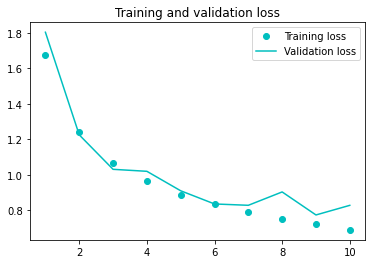

In [41]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'co', label='Training loss')
plt.plot(epochs, val_loss, 'c', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()